from google.colab import drive

drive.mount("/content/drive")


## Importing Libraries and Packages

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')
%matplotlib inline


In [13]:
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)

## Reading the Dataset

In [14]:
df = pd.read_csv(r"C:\Users\harsh\ML Assign\Data Sets\MLK\cleantelfeat.csv")

In [15]:
df.head()


,tenure,Contract,Churn,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineBackup_No internet service,DeviceProtection_No internet service,TechSupport_No internet service,StreamingTV_No internet service,StreamingMovies_No internet service,PaymentMethod_Electronic check
0,1,0,0,0,0,0,0,0,0,0,0,1
1,34,1,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,0,0,0,0,0,0,0,0
3,45,1,0,0,0,0,0,0,0,0,0,0
4,2,0,1,1,0,0,0,0,0,0,0,1


## Structure and Summary

In [16]:
df.describe()


,tenure,Contract,Churn,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineBackup_No internet service,DeviceProtection_No internet service,TechSupport_No internet service,StreamingTV_No internet service,StreamingMovies_No internet service,PaymentMethod_Electronic check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.690473,0.265370,0.439585,0.216669,0.216669,0.216669,0.216669,0.216669,0.216669,0.216669,0.335794
std,24.559481,0.833755,0.441561,0.496372,0.412004,0.412004,0.412004,0.412004,0.412004,0.412004,0.412004,0.472301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,72.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After printing the statistics of data we got to know that the data distribution is appropriate.

## Checking the null values

In [17]:
df.isna().sum()


tenure                                  0
Contract                                0
Churn                                   0
InternetService_Fiber optic             0
InternetService_No                      0
OnlineSecurity_No internet service      0
OnlineBackup_No internet service        0
DeviceProtection_No internet service    0
TechSupport_No internet service         0
StreamingTV_No internet service         0
StreamingMovies_No internet service     0
PaymentMethod_Electronic check          0
dtype: int64

So there are no null values in the dataset

## Checking the structure of the dataset

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   tenure                                7043 non-null   int64
 1   Contract                              7043 non-null   int64
 2   Churn                                 7043 non-null   int64
 3   InternetService_Fiber optic           7043 non-null   int64
 4   InternetService_No                    7043 non-null   int64
 5   OnlineSecurity_No internet service    7043 non-null   int64
 6   OnlineBackup_No internet service      7043 non-null   int64
 7   DeviceProtection_No internet service  7043 non-null   int64
 8   TechSupport_No internet service       7043 non-null   int64
 9   StreamingTV_No internet service       7043 non-null   int64
 10  StreamingMovies_No internet service   7043 non-null   int64
 11  PaymentMethod_Electronic check        7043 

## Plotting the dist for every feature.

#sns.pairplot(df)

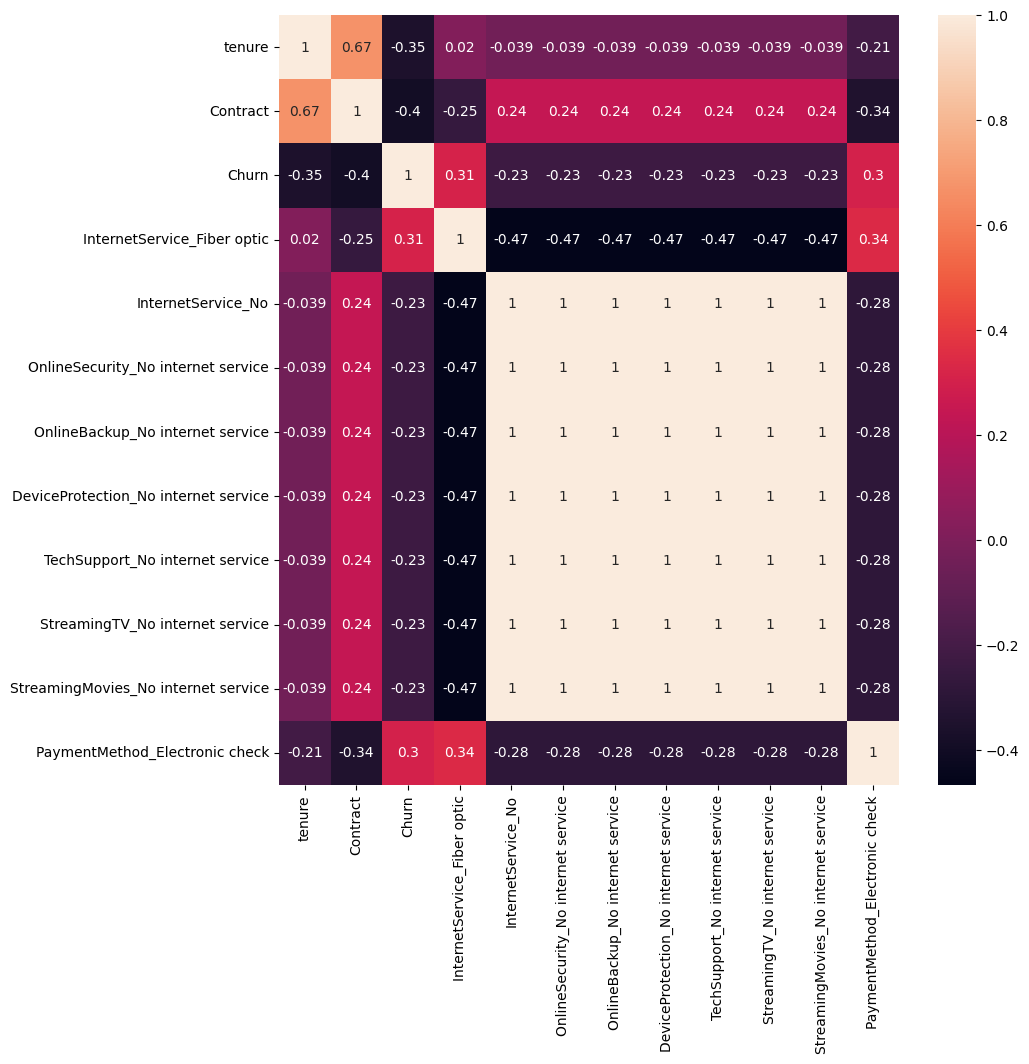

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

# Save correlation matrix as high resolution image

plt.savefig("correlation_matrix.png", dpi=300)

## Model Creation

In [21]:
# Spltting the data into X and y
X = df.drop("Churn", axis=1)
y = df[["Churn"]]

In [22]:
# Splittng the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)


In [23]:
# Creating Logistic Regression Model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


In [24]:
# Training the model
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score,
    roc_auc_score,
    recall_score,
    precision_score,
)
lr.fit(X_train, y_train)

# Predicting the model
y_pred = lr.predict(X_test)

# Printing the metrics

print("Accuracy Score: \n", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))


Accuracy Score: 
 0.7984386089425124
Confusion Matrix: 
 [[933 102]
 [182 192]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

F1 Score:  0.5748502994011976
Recall Score:  0.5133689839572193
Precision Score:  0.6530612244897959
ROC AUC Score:  0.7074091296597691


In [25]:
# Oversampling the data using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)


In [26]:
XR, yR = smote.fit_resample(X, y)

In [27]:
# Splittng the data into train and test

from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(
    XR, yR, test_size=0.2, random_state=0
)

# Importing the model

lr = LogisticRegression()


In [28]:
# Fit the model
lr.fit(X_train, y_train)

# Predicting the model
y_pred = lr.predict(X_test)

# Printing the metrics

print("Accuracy Score: \n", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Accuracy Score: 
 0.759903381642512
Confusion Matrix: 
 [[718 315]
 [182 855]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.70      0.74      1033
           1       0.73      0.82      0.77      1037

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070

F1 Score:  0.7748074309016765
Recall Score:  0.8244937319189971
Precision Score:  0.7307692307692307
ROC AUC Score:  0.7597783277213572


# Deep Learning  ANN (Artifitial Neural Networks)

In [29]:
y.value_counts()


Churn
0        5174
1        1869
dtype: int64

In [30]:
import tensorflow as tf


In [31]:
tf.__version__


'2.11.0'

In [32]:
ann = tf.keras.models.Sequential()


In [33]:
ann.add(tf.keras.layers.Dense(units=16, activation="relu"))

ann.add(tf.keras.layers.Dense(units=32, activation="relu"))

ann.add(tf.keras.layers.Dense(units=64, activation="relu"))

ann.add(tf.keras.layers.Dense(units=128, activation="relu"))

ann.add(tf.keras.layers.Dense(units=64, activation="relu"))

ann.add(tf.keras.layers.Dense(units=32, activation="relu"))

ann.add(tf.keras.layers.Dense(units=16, activation="relu"))

ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

Compiling Ann

In [34]:
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [39]:
ann.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data=(X_test, y_test),
)

Epoch 1/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4697 - accuracy: 0.7769 - val_loss: 0.5051 - val_accuracy: 0.7696
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4683 - accuracy: 0.7783 - val_loss: 0.5072 - val_accuracy: 0.7633
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4716 - accuracy: 0.7754 - val_loss: 0.4891 - val_accuracy: 0.7686
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4685 - accuracy: 0.7776 - val_loss: 0.4963 - val_accuracy: 0.7700
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4710 - accuracy: 0.7745 - val_loss: 0.4847 - val_accuracy: 0.7667
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4681 - accuracy: 0.7762 - val_loss: 0.4882 - val_accuracy: 0.7696
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4689 - accuracy: 0.7769 - val_loss: 0.4987 - val_accuracy: 0.7676

In [40]:
ypred = ann.predict(X_test) >= 0.5


65/65 [==============================] - 0s 2ms/step


In [41]:
print("Accuracy:", accuracy_score(y_test, ypred) * 100)
print("Classification Metrics:", classification_report(y_test, ypred))
print("ROC AUC score:", roc_auc_score(y_test, ypred, multi_class="ovr"))
print("Confusion Matrix\n", confusion_matrix(y_test, ypred))

Accuracy: 76.7632850241546
Classification Metrics:               precision    recall  f1-score   support

           0       0.80      0.71      0.75      1033
           1       0.74      0.82      0.78      1037

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070

ROC AUC score: 0.767530229523133
Confusion Matrix
 [[738 295]
 [186 851]]
